EXPLORATORY DATA ANALYSIS ON THE TERRORISM DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('globalterror.csv', encoding="ISO-8859-1")

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


TRANSPOSING THE DATA TO READ IT CONVINIENTLY

In [6]:
df.describe().transpose()['max']

eventid      2.017123e+11
iyear        2.017000e+03
imonth       1.200000e+01
iday         3.100000e+01
extended     1.000000e+00
                 ...     
nreleased    2.769000e+03
INT_LOG      1.000000e+00
INT_IDEO     1.000000e+00
INT_MISC     1.000000e+00
INT_ANY      1.000000e+00
Name: max, Length: 77, dtype: float64

In [7]:
#stastical details of the dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#removing NaN
new_df = df.dropna(axis=1) #drop NaN value columns

In [9]:
new_df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


<AxesSubplot:xlabel='country_txt', ylabel='Count'>

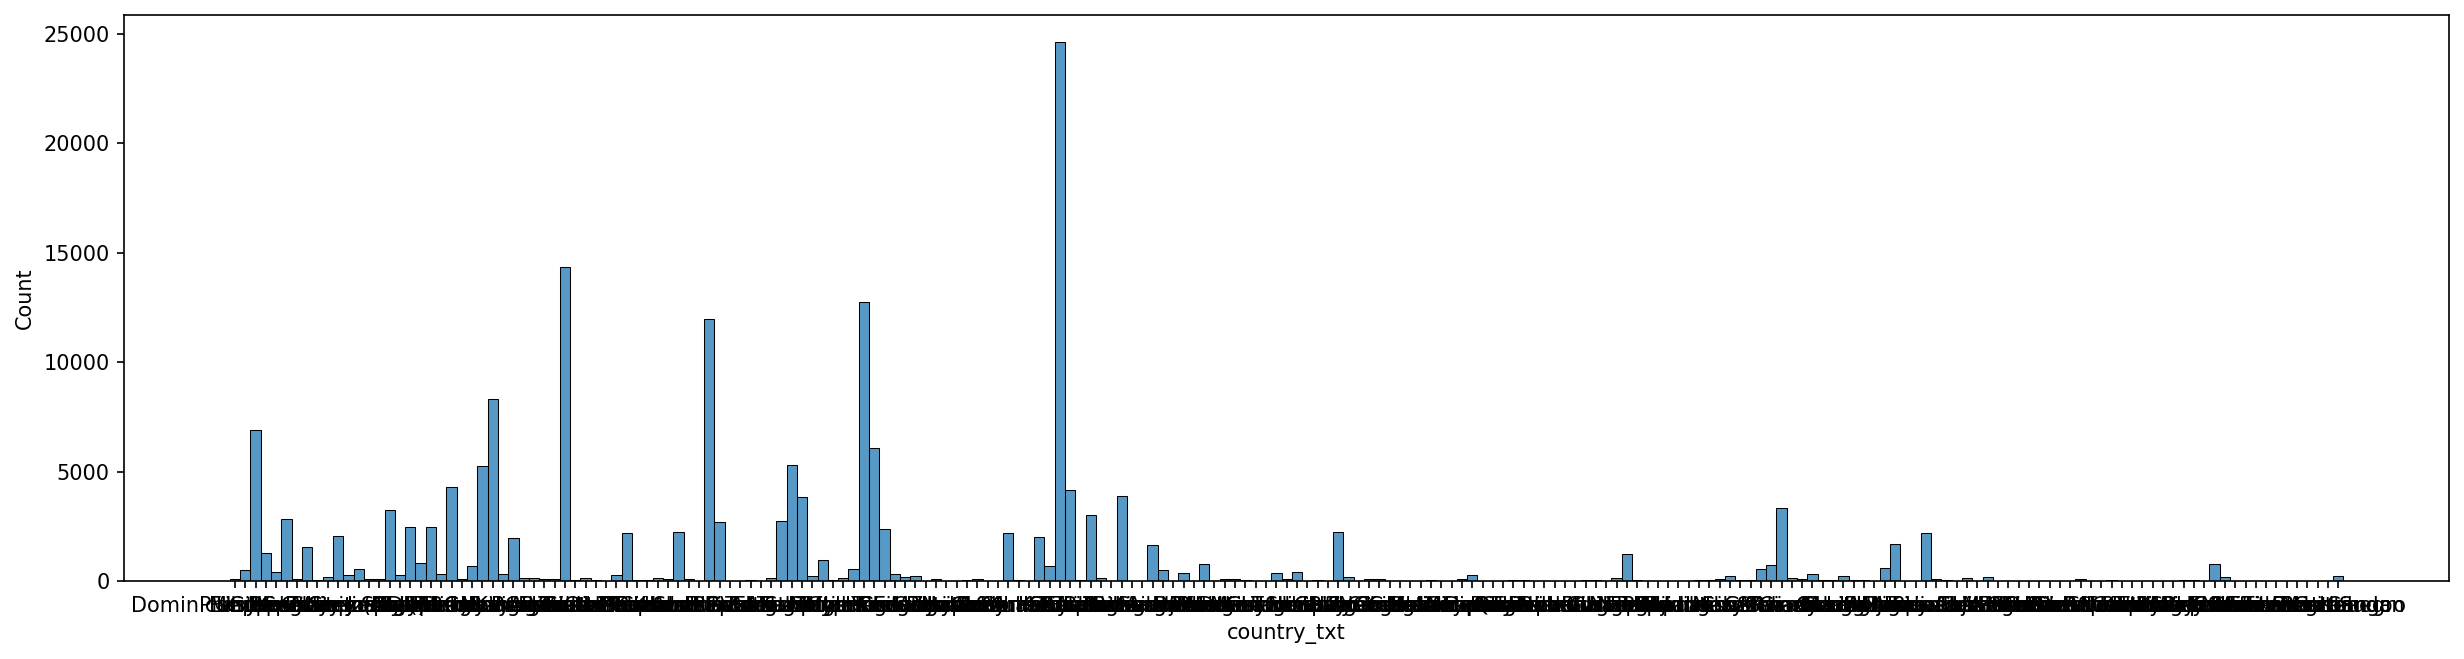

In [11]:
plt.figure(figsize=(20,5), dpi=150)
sns.histplot(new_df, x='country_txt')

IN ORDER TO GET THE READABLE AND PRECISE DATA, WE WILL NOW SORT ACCORDINGLY TO NUMBER OF TERRORISM OCCURED IN A COUNTRY

In [12]:
group1 = new_df.groupby('country_txt').count()

In [13]:
group1

,eventid,iyear,imonth,iday,extended,country,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
country_txt,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12731,12731,12731,12731,12731,12731,12731,12731,12731,12731,...,12731,12731,12731,12731,12731,12731,12731,12731,12731,12731
Albania,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
Algeria,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743,...,2743,2743,2743,2743,2743,2743,2743,2743,2743,2743
Andorra,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Angola,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,...,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347
Yugoslavia,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
Zaire,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


In [14]:
country_count = new_df['country_txt'].value_counts()
country_count.head(25) #occurence of terror events in the countries

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Name: country_txt, dtype: int64

WE CAN SAVE THIS SORTED DATASET TO A NEW FILE

In [15]:
country_count.to_csv('file1.csv')

In [17]:
most_terror = pd.read_csv('file1.csv')

In [18]:
most_terror.head()

,Unnamed: 0,country_txt
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [19]:
# rename the columns
most_terror.rename(columns={'Unnamed: 0':'Country','country_txt':'Terror_count'}, inplace=True)

In [20]:
most_terror1 = most_terror.head(30)

In [21]:
most_terror1

,Country,Terror_count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


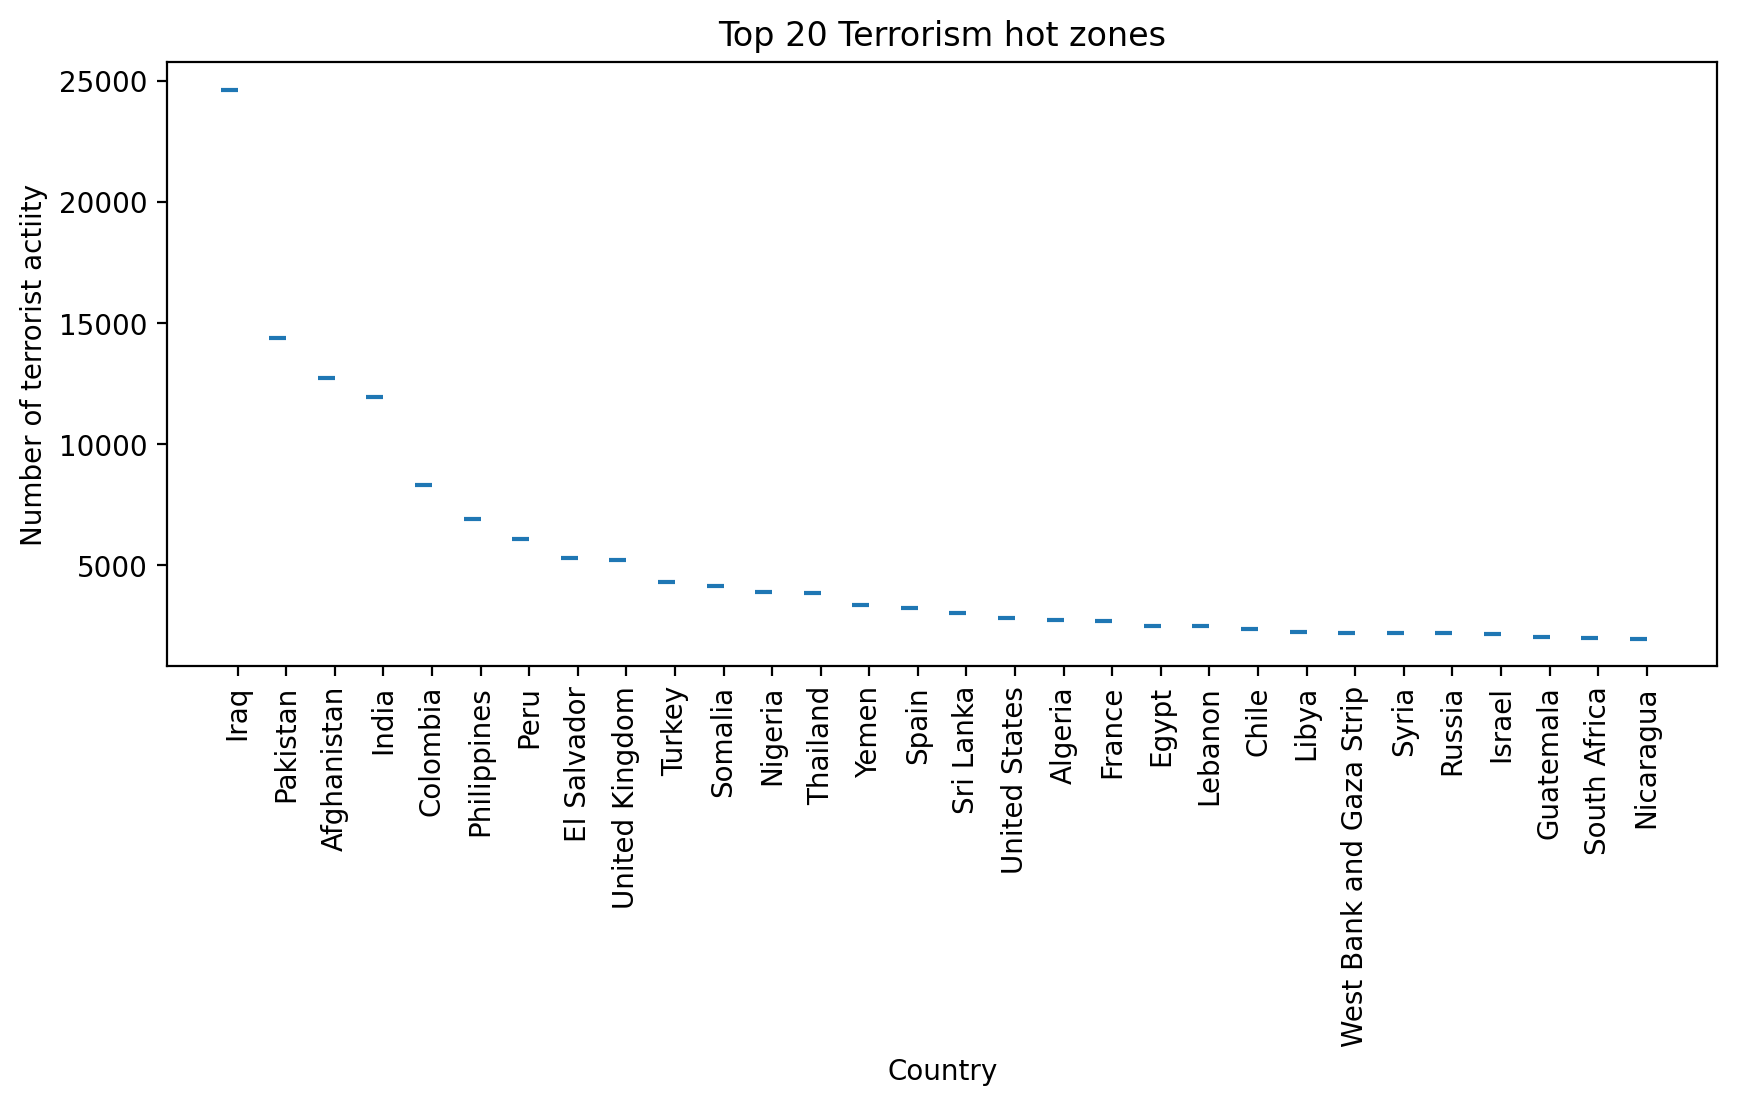

In [22]:
plt.figure(figsize=(10,4), dpi=200)
plt.scatter(data=most_terror1, x='Country', y='Terror_count', marker=0)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of terrorist actiity')
plt.title('Top 20 Terrorism hot zones');